In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from os import walk
import numpy as np
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/evaluation/synthetic/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/data/travis/'
plot_output_folder = '/Users/sanjanatule/Documents/uq/Projects/mipindel/plots_for_paper/'

In [21]:
plt.rc('axes',  titlesize=15)     # fontsize of the axes title
plt.rc('axes',  labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend',fontsize=10)    # legend fontsize
plt.rc('font',  size=12)          # controls default text sizes
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Serif"
colors = sns.color_palette('deep')
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15,12)})
sns.set_style("ticks")
ref_syn_dataset = {(0,0): '500',(0,1):'700',(1,0):'1000',(1,1):'2000'}
sns.set_context('talk')
width = 0.3

# 1 - DIFFERENCE IN INDEL EVENTS

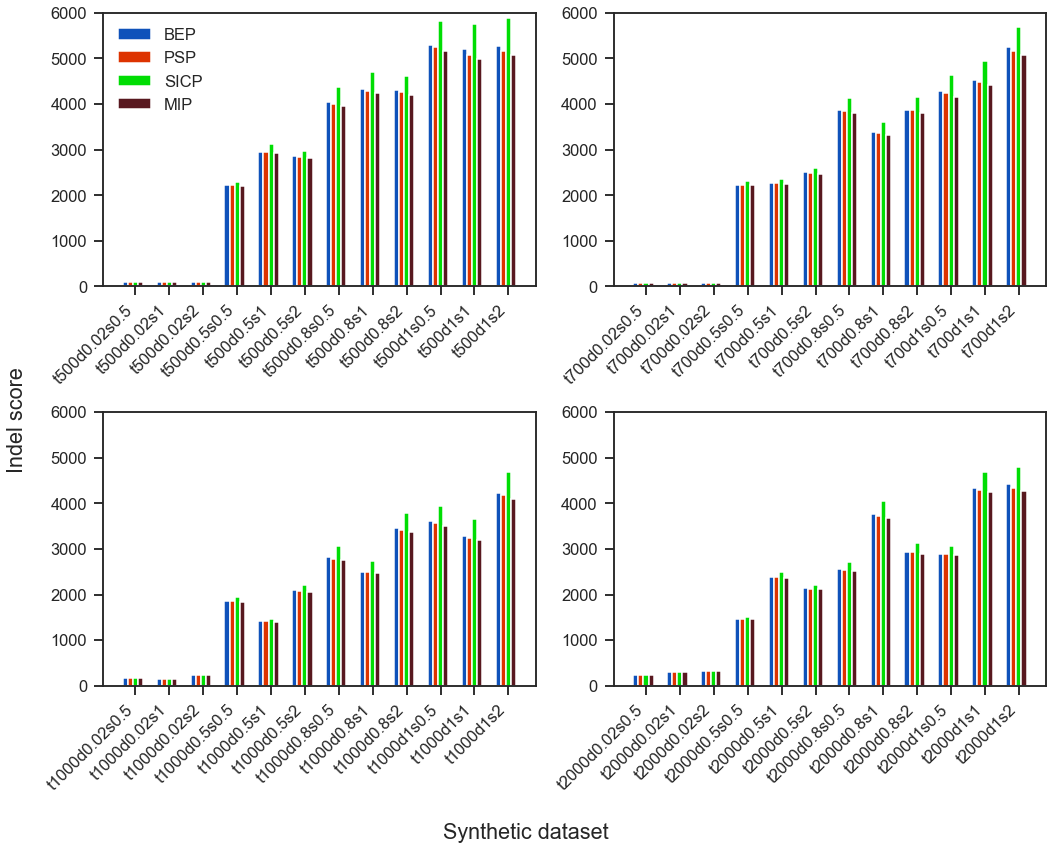

In [22]:
# read all score files for all protein families in the folder
fig,axs = plt.subplots(tight_layout=True,nrows=2, ncols=2)
for extant_size in ['500','700','1000','2000']: 
    with open(experiment_result_folder + extant_size + '_indel_diff_evaluation_plot.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*indscore*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )


# generate plots
for i in range(0,2):
    for j in range(0,2):
        score_data = pd.read_csv(experiment_result_folder + ref_syn_dataset[(i,j)] + '_indel_diff_evaluation_plot.csv')
        #score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
        score_data = score_data.sort_values(['protein_family',"method"])
        score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()

        labels = score_data['protein_family']
        x = np.arange(len(labels))     
        rects1 = axs[i,j].bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
        rects2 = axs[i,j].bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
        rects3 = axs[i,j].bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
        rects4 = axs[i,j].bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
        ymin, ymax = plt.ylim()

        axs[i,j].set_xticks(x)
        axs[i,j].set_xticklabels(labels)
        plt.sca(axs[i,j])
        plt.xticks(rotation=45,ha="right")
        plt.ylim(0,6000)
        if i ==0 and j == 0:
            axs[i,j].legend(loc="upper left")
        bbox = axs[i,j].get_tightbbox(fig.canvas.get_renderer())

fig.supxlabel('Synthetic dataset')
fig.supylabel('Indel score')
filename = plot_output_folder + "synthetic_indel_score_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
plt.show()

# 2 - OUT OF DISTRIBUTION PATTERNS


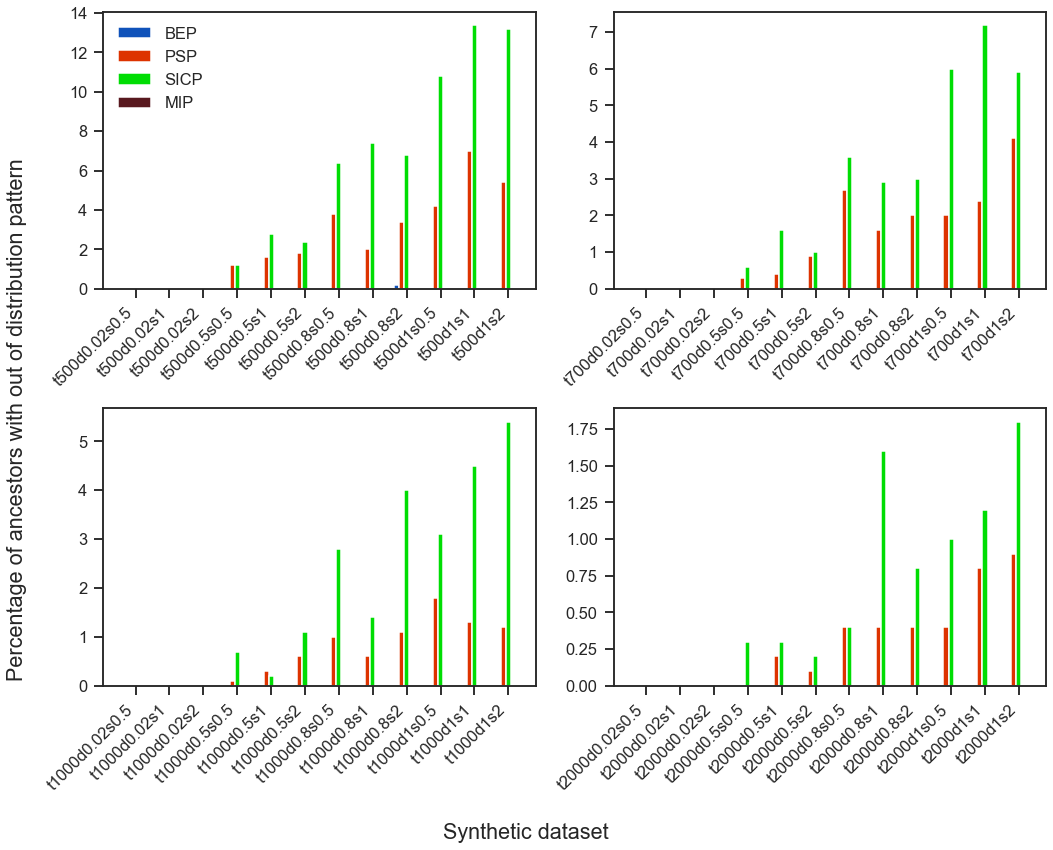

In [31]:
fig,axs = plt.subplots(tight_layout=True,nrows=2, ncols=2)
for extant_size in ['500','700','1000','2000']: 
#     print(f"extant_size {extant_size}")
    with open(experiment_result_folder + extant_size + '_out_of_dist_evaluation_plot.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*out_dist_percent*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )

sns.set_context('talk')
# generate plots
for i in range(0,2):
    for j in range(0,2):
        
        score_data = pd.read_csv(experiment_result_folder + ref_syn_dataset[(i,j)] + '_out_of_dist_evaluation_plot.csv')
        #score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
        score_data = score_data.sort_values(['protein_family',"method"])
        score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()    

        
        labels = score_data['protein_family']
        x = np.arange(len(labels)) 
        rects1 = axs[i,j].bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
        rects2 = axs[i,j].bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
        rects3 = axs[i,j].bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
        rects4 = axs[i,j].bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
        ymin, ymax = plt.ylim()
        axs[i,j].set_xticks(x)
        axs[i,j].set_xticklabels(labels)
        plt.sca(axs[i,j])
        plt.xticks(rotation=45,ha="right")
        if i ==0 and j == 0:
            axs[i,j].legend(loc="upper left")
        bbox = axs[i,j].get_tightbbox(fig.canvas.get_renderer())

fig.supxlabel('Synthetic dataset')
fig.supylabel('Percentage of ancestors with out of distribution pattern')
filename = plot_output_folder + "synthetic_out_of_dist_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
plt.show()

# 3 - COHESIVENESS MEASURE

### 3.1 -  ANCESTORS WITH 3 MUTATION AWAY FROM ITS NEIGHBOURS

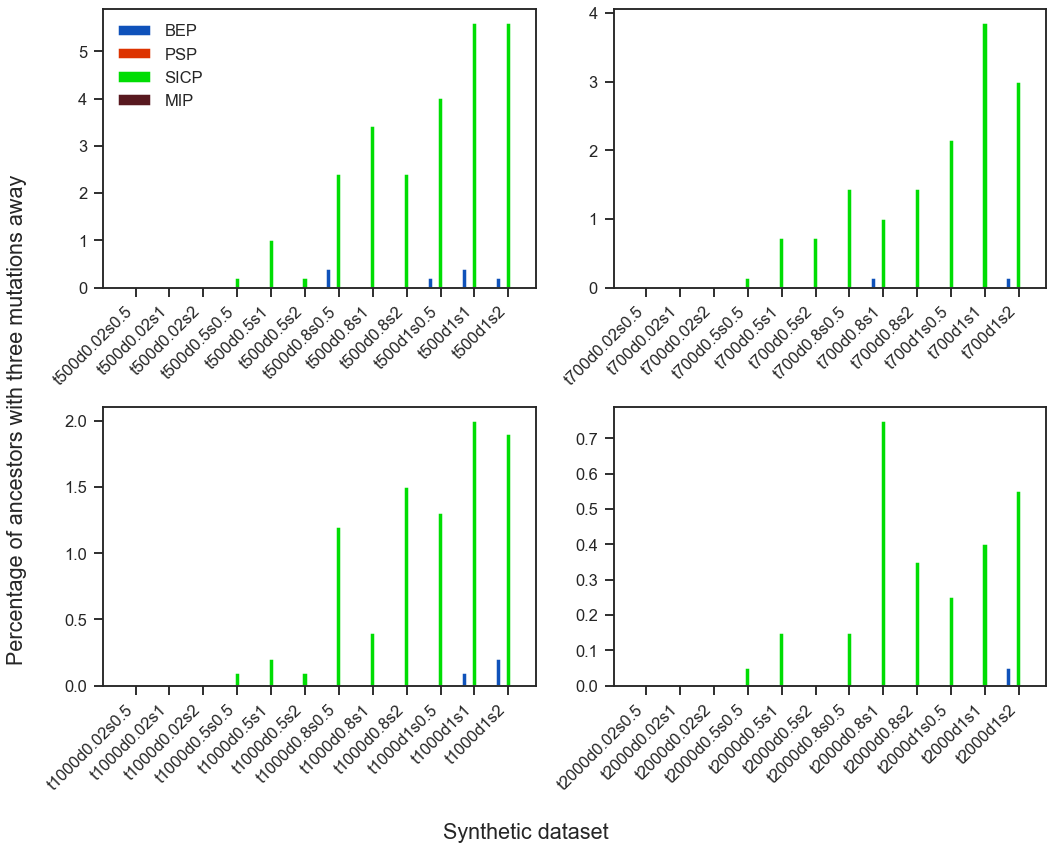

In [37]:
fig,axs = plt.subplots(tight_layout=True,nrows=2, ncols=2)
for extant_size in ['500','700','1000','2000']: 
    with open(experiment_result_folder + extant_size + '_ancestors_3_mutation_away.csv', 'w') as outfile:
        outfile.write('protein_family,method,score\n')
        for (sub_folder, _, _) in walk(data_folder):
            if extant_size + 'd' in sub_folder :
                os.chdir(sub_folder)
                for fname in glob.glob("*ancestors_with_3_mut*"):
                    with open(fname) as infile:
                        for line in infile:
                            pr = sub_folder.split('/')[-1]
                            outfile.write(pr + ',' + line + '\n' )


sns.set_context('talk')
# generate plots
for i in range(0,2):
    for j in range(0,2):
        
        score_data = pd.read_csv(experiment_result_folder + ref_syn_dataset[(i,j)] + '_ancestors_3_mutation_away.csv')
        score_data = score_data.sort_values(['protein_family',"method"])
        score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()

        labels = score_data['protein_family']
        x = np.arange(len(labels)) 
        rects1 = axs[i,j].bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
        rects2 = axs[i,j].bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
        rects3 = axs[i,j].bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
        rects4 = axs[i,j].bar(x + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
        ymin, ymax = plt.ylim()

        axs[i,j].set_xticks(x)
        axs[i,j].set_xticklabels(labels)
        plt.sca(axs[i,j])
        plt.xticks(rotation=45,ha="right")
        if i ==0 and j == 0:
            axs[i,j].legend(loc="upper left")
        bbox = axs[i,j].get_tightbbox(fig.canvas.get_renderer())
        
fig.supxlabel('Synthetic dataset')
fig.supylabel('Percentage of ancestors with three mutations away')
filename = plot_output_folder + "synthetic_ancestors_3_mutation_away_comparison_plot.jpg"
fig.savefig(filename,dpi=1000)
plt.show()